# Explore prepared data

We'll use very simple PCA to explore which variables are important to linearly separate out the EC classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Set a color palette for categorical variables
sns.set_palette("Set1")

%matplotlib inline


In [2]:
df = pd.read_csv("all_prepareddata_for_EzyPredict.csv")

In [3]:
## for colouring i want to get only the first EC level
df['EC number'] = df['EC number'].astype(str)
df['EC_first_level'] = df['EC number'].str.split('.').str[0]
df.columns[1:20]

Index(['Isoelectric Point', 'Tiny', 'Small', 'Aliphatic', 'Aromatic',
       'Non-polar', 'Polar', 'Charged', 'Basic', 'Acidic', 'Encoding_1',
       'Encoding_2', 'Encoding_3', 'Encoding_4', 'Encoding_5', 'Encoding_6',
       'Encoding_7', 'Encoding_8', 'Encoding_9'],
      dtype='object')

In [4]:
columns_to_drop = ['UniprotID','EC_first_level', 'EC number']
df_selected = df.drop(columns=columns_to_drop)
df_selected

Isoelectric Point      Tiny     Small  Aliphatic  Aromatic  Non-polar  \
0            -0.940575  0.223529  0.421176   0.221176  0.185882   0.517647   
1             1.390710  0.301111  0.521111   0.314444  0.113333   0.551111   
2             1.390710  0.301111  0.521111   0.314444  0.113333   0.551111   
3             1.417205  0.289421  0.520958   0.297405  0.083832   0.499002   
4            -0.546599  0.284314  0.523529   0.290196  0.107843   0.547059   
..                 ...       ...       ...        ...       ...        ...   
939          -1.271676  0.217877  0.441341   0.279330  0.139665   0.486034   
940           1.026743  0.272066  0.480789   0.278297  0.143302   0.528557   
941          -0.708071  0.293333  0.546667   0.315556  0.120000   0.537778   
942          -0.933966  0.272727  0.513131   0.278788  0.101010   0.490909   
943           1.732767  0.215743  0.411079   0.265306  0.148688   0.518950   

        Polar   Charged     Basic    Acidic  ...  Encoding_1271  \
0    0.482353  0.270588  0.134118  0.136471  ...       0.192499   
1    0.448889  0.236667  0.136667  0.100000  ...       0.170773   
2    0.448889  0.236667  0.136667  0.100000  ...       0.170773   
3    0.500998  0.247505  0.143713  0.103792  ...       0.180229   
4    0.452941  0.268627  0.137255  0.131373  ...       0.138517   
..        ...       ...       ...       ...  ...            ...   
939  0.513966  0.329609  0.156425  0.173184  ...       0.387752   
940  0.471443  0.237799  0.136033  0.101765  ...       0.041060   
941  0.462222  0.226667  0.115556  0.111111  ...       0.326937   
942  0.509091  0.272727  0.135354  0.137374  ...       0.248624   
943  0.481050  0.276968  0.174927  0.102041  ...       0.282344   

     Encoding_1272  Encoding_1273  Encoding_1274  Encoding_1275  \
0         0.006006      -0.078706       0.067504      -0.104536   
1         0.003671      -0.082104       0.138453       0.045217   
2         0.003671      -0.082104       0.138453       0.045217   
3         0.049613      -0.072365       0.065138      -0.225438   
4        -0.129664      -0.186735       0.083157      -0.123854   
..             ...            ...            ...            ...   
939      -0.113742      -0.207152       0.127200      -0.143254   
940       0.062649      -0.167788       0.061040       0.061721   
941      -0.116295      -0.046008       0.083472      -0.227827   
942      -0.066980      -0.156144       0.208804      -0.397433   
943      -0.022586      -0.123089       0.034297      -0.518293   

     Encoding_1276  Encoding_1277  Encoding_1278  Encoding_1279  Encoding_1280  
0         0.024012       0.099171      -0.014483       0.063116      -0.103292  
1         0.080589      -0.004792      -0.045767      -0.085559       0.108033  
2         0.080589      -0.004792      -0.045767      -0.085559       0.108033  
3         0.022500      -0.035332      -0.035813       0.007896       0.042926  
4        -0.139891       0.068116      -0.059735      -0.066775      -0.084309  
..             ...            ...            ...            ...            ...  
939       0.032675       0.146173       0.117517      -0.098919       0.103357  
940       0.003030       0.073604      -0.005264      -0.089613       0.114331  
941       0.044395      -0.001845       0.118277      -0.178310       0.125161  
942      -0.088597       0.103097      -0.012162      -0.078730       0.124578  
943      -0.009626       0.062627      -0.091984       0.015366       0.035516  

[944 rows x 1290 columns]

In [5]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on your selected DataFrame
df_scaled = scaler.fit_transform(df_selected)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)

In [6]:
pca = PCA(n_components=100)
principal_components = pca.fit_transform(df_scaled)

In [7]:
explained_variance = pca.explained_variance_ratio_

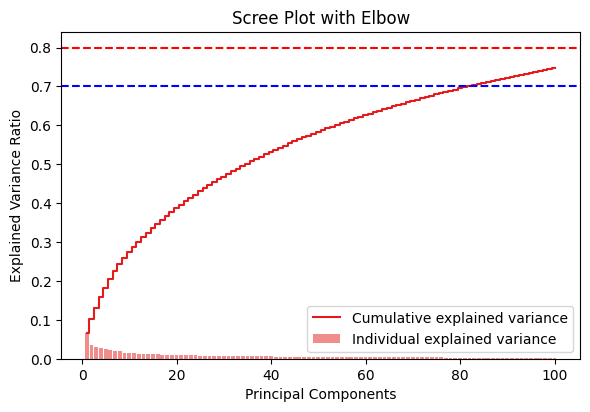

In [8]:

plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.axhline(y=0.7, color='b', linestyle='--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Scree Plot with Elbow')
plt.show()

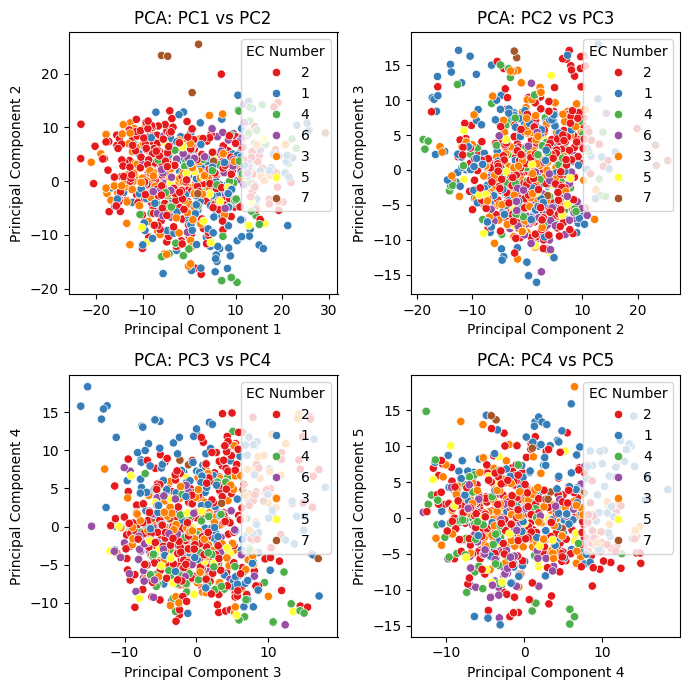

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

# PC1 vs PC2
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=df['EC_first_level'], ax=axes[0, 0])
axes[0, 0].set_xlabel('Principal Component 1')
axes[0, 0].set_ylabel('Principal Component 2')
axes[0, 0].set_title('PCA: PC1 vs PC2')
axes[0, 0].legend(title='EC Number', loc='upper right')

# PC2 vs PC3
sns.scatterplot(x=principal_components[:, 1], y=principal_components[:, 2], hue=df['EC_first_level'], ax=axes[0, 1])
axes[0, 1].set_xlabel('Principal Component 2')
axes[0, 1].set_ylabel('Principal Component 3')
axes[0, 1].set_title('PCA: PC2 vs PC3')
axes[0, 1].legend(title='EC Number', loc='upper right')

# PC3 vs PC4
sns.scatterplot(x=principal_components[:, 2], y=principal_components[:, 3], hue=df['EC_first_level'], ax=axes[1, 0])
axes[1, 0].set_xlabel('Principal Component 3')
axes[1, 0].set_ylabel('Principal Component 4')
axes[1, 0].set_title('PCA: PC3 vs PC4')
axes[1, 0].legend(title='EC Number', loc='upper right')

# PC4 vs PC5
sns.scatterplot(x=principal_components[:, 3], y=principal_components[:, 4], hue=df['EC_first_level'], ax=axes[1, 1])
axes[1, 1].set_xlabel('Principal Component 4')
axes[1, 1].set_ylabel('Principal Component 5')
axes[1, 1].set_title('PCA: PC4 vs PC5')
axes[1, 1].legend(title='EC Number', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


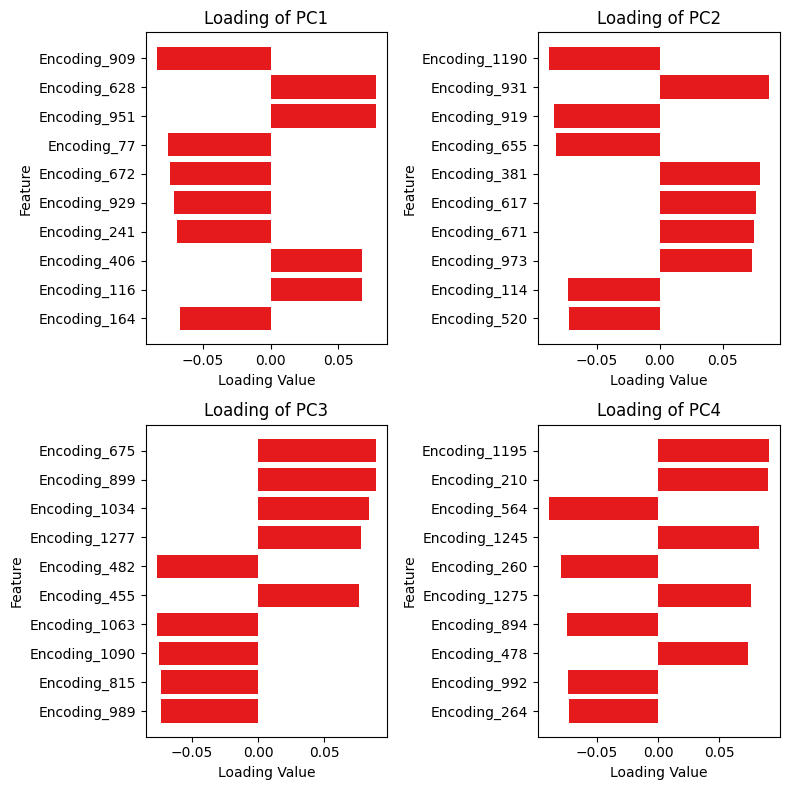

In [10]:
# Create subplots for each of the first 4 PCs
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(4):
    # Access the loadings (coefficients) of the current PC
    loadings = pca.components_[i]
    
    # Create a DataFrame to associate loadings with feature names
    loading_df = pd.DataFrame({'Feature': df_selected.columns, 'Loading': loadings})
    
    # Sort the DataFrame by absolute loading values to see the most influential features
    loading_df['Absolute Loading'] = loading_df['Loading'].abs()
    sorted_loading_df = loading_df.sort_values(by='Absolute Loading', ascending=False)
    
    # Plot the top N most influential features on the current PC
    N = 10  # You can adjust this value to view more or fewer features
    top_features = sorted_loading_df.head(N)
    
    # Plot the loading values
    row = i // 2
    col = i % 2
    axes[row, col].barh(top_features['Feature'], top_features['Loading'])
    axes[row, col].set_xlabel('Loading Value')
    axes[row, col].set_ylabel('Feature')
    axes[row, col].set_title(f'Loading of PC{i + 1}')
    axes[row, col].invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()


In [11]:
## How much impact does isoelectric point and some of the other pepstats have ?

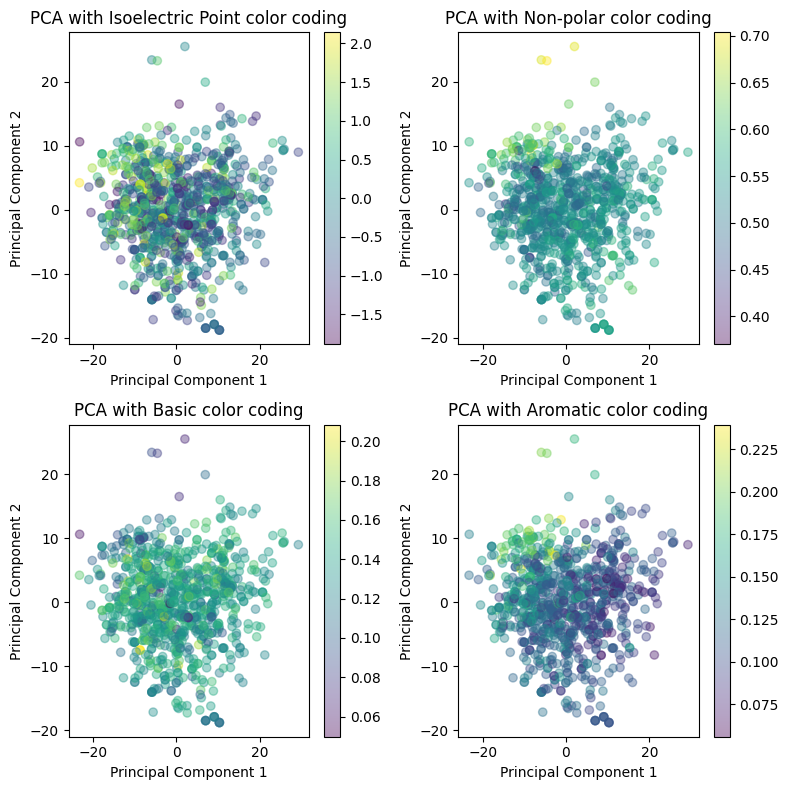

In [12]:
fig, axarr = plt.subplots(2, 2, figsize=(8, 8))

# Plotting for Isoelectric Point
sc1 = axarr[0, 0].scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.4, c=df_selected['Isoelectric Point'].astype(float))
plt.colorbar(sc1, ax=axarr[0, 0])
axarr[0, 0].set_xlabel('Principal Component 1')
axarr[0, 0].set_ylabel('Principal Component 2')
axarr[0, 0].set_title('PCA with Isoelectric Point color coding')

# Plotting for Non-polar
sc2 = axarr[0, 1].scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.4, c=df_selected['Non-polar'].astype(float))
plt.colorbar(sc2, ax=axarr[0, 1])
axarr[0, 1].set_xlabel('Principal Component 1')
axarr[0, 1].set_ylabel('Principal Component 2')
axarr[0, 1].set_title('PCA with Non-polar color coding')

# Plotting for Basic
sc3 = axarr[1, 0].scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.4, c=df_selected['Basic'].astype(float))
plt.colorbar(sc3, ax=axarr[1, 0])
axarr[1, 0].set_xlabel('Principal Component 1')
axarr[1, 0].set_ylabel('Principal Component 2')
axarr[1, 0].set_title('PCA with Basic color coding')

# Plotting for Aromatic
sc4 = axarr[1, 1].scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.4, c=df_selected['Aromatic'].astype(float))
plt.colorbar(sc4, ax=axarr[1, 1])
axarr[1, 1].set_xlabel('Principal Component 1')
axarr[1, 1].set_ylabel('Principal Component 2')
axarr[1, 1].set_title('PCA with Aromatic color coding')

plt.tight_layout()
plt.show()


## Trying kernel PCA


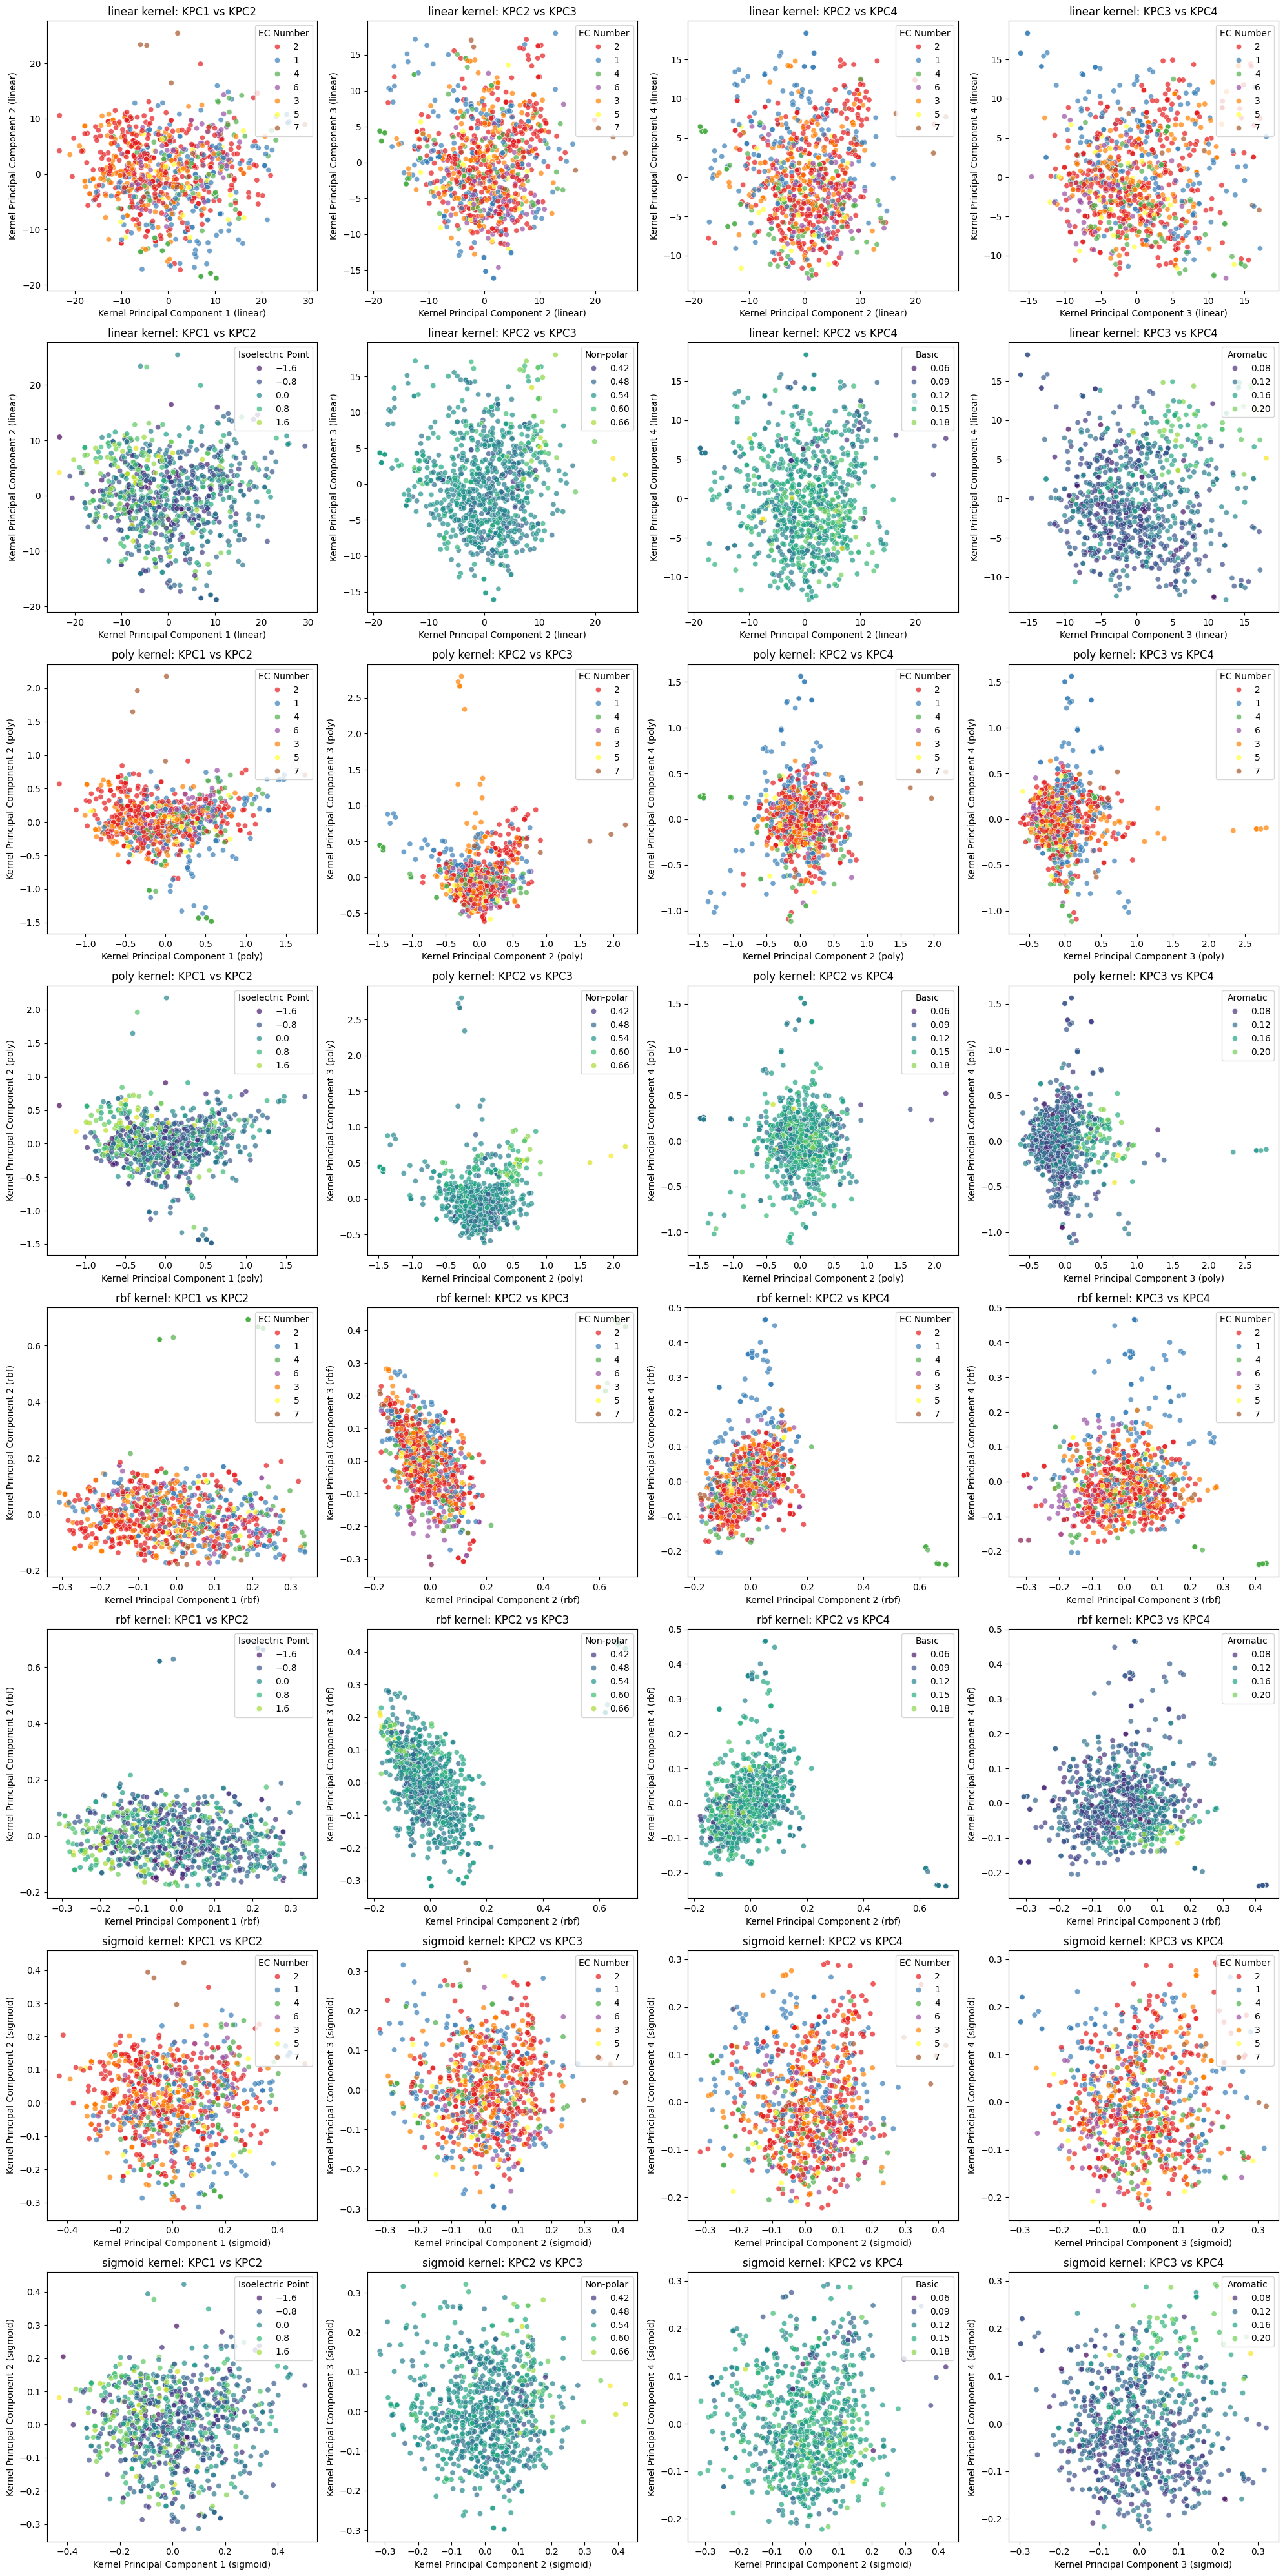

In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
properties = ['Isoelectric Point', 'Non-polar', 'Basic', 'Aromatic']

comparisons = [(0, 1), (1, 2), (1, 3), (2, 3)]

# We now have 2 rows per kernel: one for EC_first_level, one for the peptide properties
fig, axes = plt.subplots(2 * len(kernels), len(comparisons), figsize=(20, 2*len(kernels)*5))  

for i, kernel in enumerate(kernels):
    kpca = KernelPCA(kernel=kernel, n_components=4)
    kpca_components = kpca.fit_transform(df_scaled)
    
    # First row for each kernel: EC_first_level
    for j, (x_comp, y_comp) in enumerate(comparisons):
        ax = axes[2*i, j]
        sns.scatterplot(x=kpca_components[:, x_comp], 
                        y=kpca_components[:, y_comp], 
                        hue=df['EC_first_level'], ax=ax,
                        alpha=0.7)
        ax.set_xlabel(f'Kernel Principal Component {x_comp+1} ({kernel})')
        ax.set_ylabel(f'Kernel Principal Component {y_comp+1} ({kernel})')
        ax.set_title(f'{kernel} kernel: KPC{x_comp+1} vs KPC{y_comp+1}')
        ax.legend(title='EC Number', loc='upper right')

    # Second row for each kernel: peptide properties
    for j, (x_comp, y_comp) in enumerate(comparisons):
        ax = axes[2*i + 1, j]
        sns.scatterplot(x=kpca_components[:, x_comp], 
                        y=kpca_components[:, y_comp], 
                        hue=df_selected[properties[j]].astype(float), ax=ax,
                        palette="viridis", alpha=0.7)
        ax.set_xlabel(f'Kernel Principal Component {x_comp+1} ({kernel})')
        ax.set_ylabel(f'Kernel Principal Component {y_comp+1} ({kernel})')
        ax.set_title(f'{kernel} kernel: KPC{x_comp+1} vs KPC{y_comp+1}')
        ax.legend(title=properties[j], loc='upper right')

plt.tight_layout()
plt.show()


#### rbf and polynomial kernels seem to separate out some ECs .. better than the others .. but still not great - will just take the whole dataset and try to implement some other overfitting penalty rather than use PC dimensions